### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. Standarize data
#### 3. The elbow technique
#### 4. k-means clustering

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# This option ensures the graphs  are displayed 
%matplotlib inline

In [3]:
path = 'C:/Users/Juliana/Documents/DATA ANALYTICS COURSE/IMMERSION/6'

In [40]:
# Import data
df = pd.read_csv(os.path.join(path,'02 Data','Merged Data','merged_data_clean.csv'))

In [41]:
df.shape

(9134, 12)

In [42]:
df.head()

,Unnamed: 0,Year,Country,Country_Code,Region,Continent,Number_of_Events,Temp_Change_AVG,Net_Migration,Population,Carbon_Emissions,Energy_Consumption
0,0,1965,Indonesia,IDN,South-Eastern Asia,Asia,1.0,0.290833,-61146.0,100267062.0,24689.911,84.51602
1,1,1965,Argentina,ARG,South America,Americas,1.0,0.849750,33973.0,22159650.0,58866.351,328.52762
2,2,1965,Bangladesh,BGD,Southern Asia,Asia,3.0,0.387833,47618.0,55385112.0,19974.149,NaN
3,5,1965,Bulgaria,BGR,Eastern Europe,Europe,1.0,1.321500,1838.0,8204168.0,46317.877,119.92565
4,6,1965,Bahamas (the),BHS,Caribbean,Americas,1.0,0.328250,2493.0,140059.0,1316.453,NaN


In [43]:
# Check for missing values

df.isnull().sum() 

Unnamed: 0               0
Year                     0
Country                  0
Country_Code             0
Region                   0
Continent                0
Number_of_Events         0
Temp_Change_AVG         39
Net_Migration          185
Population             659
Carbon_Emissions       560
Energy_Consumption    1590
dtype: int64

In [44]:
# Fill missing values 
df['Temp_Change_AVG'].fillna(df['Temp_Change_AVG'].mean(), inplace=True)
df['Net_Migration'].fillna(df['Net_Migration'].median(), inplace=True)
df['Population'].fillna(df['Population'].mode()[0], inplace=True)
df['Carbon_Emissions'].fillna(df['Carbon_Emissions'].mean(), inplace=True)
df['Energy_Consumption'].fillna(df['Energy_Consumption'].mean(), inplace=True)

In [45]:
df.columns

Index(['Unnamed: 0', 'Year', 'Country', 'Country_Code', 'Region', 'Continent',
       'Number_of_Events', 'Temp_Change_AVG', 'Net_Migration', 'Population',
       'Carbon_Emissions', 'Energy_Consumption'],
      dtype='object')

In [46]:
# Remove categorical columns
df_cluster=df.drop(columns = ['Unnamed: 0','Country_Code', 'Region', 'Continent','Population','Country', 'Carbon_Emissions', 'Energy_Consumption'])

In [47]:
# Check for missing values

df_cluster.isnull().sum() 

Year                0
Number_of_Events    0
Temp_Change_AVG     0
Net_Migration       0
dtype: int64

### 2. Standarize data

In [48]:
scaler=StandardScaler() #sets 'scaler' as a shortcut

In [49]:
columns=df_cluster.columns.values.tolist() #create a list of column names for your df
columns #list the columns

['Year', 'Number_of_Events', 'Temp_Change_AVG', 'Net_Migration']

In [50]:
df_scaled=pd.DataFrame(scaler.fit_transform(df_cluster), columns=columns) #run the scaler on your df to a new 'df_scaled'
df_scaled.head() #show scaled df

,Year,Number_of_Events,Temp_Change_AVG,Net_Migration
0,-1.704037,-0.151613,-1.194922,-0.382381
1,-1.704037,-0.151613,-0.037842,0.192416
2,-1.704037,0.507516,-0.994110,0.274871
3,-1.704037,-0.151613,0.938784,-0.001774
4,-1.704037,-0.151613,-1.117461,0.002185


### 3. The elbow technique

In [51]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [52]:
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\Juliana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Juliana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Juliana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Juliana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Juliana\anaconda3\lib\site-packages\skl

[-36535.999999999985,
 -26233.138835396836,
 -21157.503911879983,
 -17569.004494304238,
 -15005.486849490937,
 -13376.93240532859,
 -12040.351692551318,
 -10834.363309192453,
 -9857.635259308996]

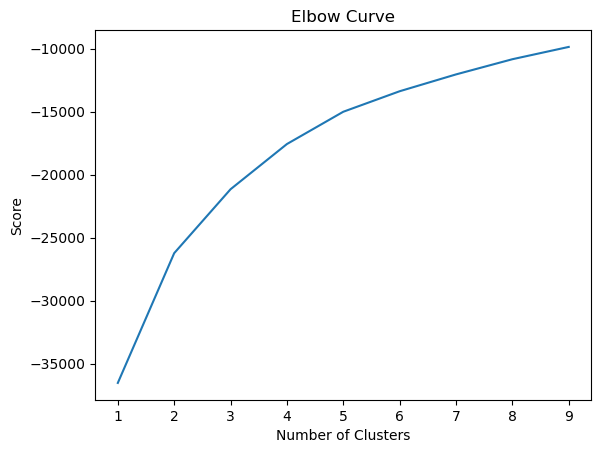

In [53]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 4. k-means clustering

In [54]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4)

In [55]:
# Fit the k-means object to the data.

kmeans.fit(df_scaled)

C:\Users\Juliana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [56]:
df_scaled['Clusters'] = kmeans.fit_predict(df_scaled)

C:\Users\Juliana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [57]:
df_scaled.head()

,Year,Number_of_Events,Temp_Change_AVG,Net_Migration,Clusters
0,-1.704037,-0.151613,-1.194922,-0.382381,1
1,-1.704037,-0.151613,-0.037842,0.192416,1
2,-1.704037,0.507516,-0.994110,0.274871,1
3,-1.704037,-0.151613,0.938784,-0.001774,1
4,-1.704037,-0.151613,-1.117461,0.002185,1


In [58]:
df_scaled['Clusters'].value_counts()

1    4808
0    3945
2     311
3      70
Name: Clusters, dtype: int64

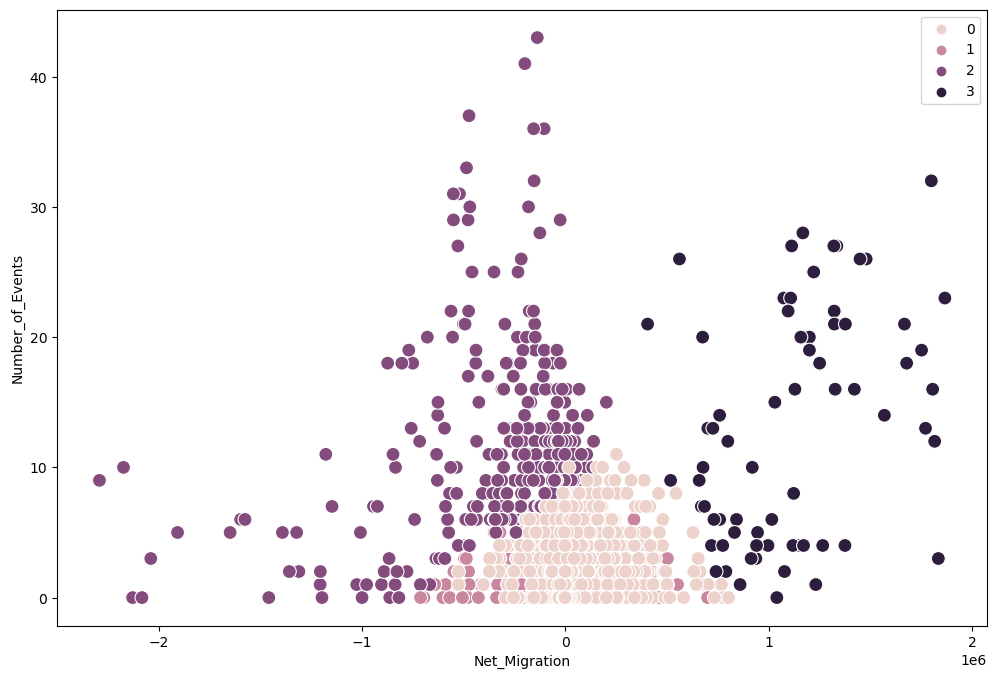

In [59]:
# Plot the clusters
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Net_Migration'], y=df['Number_of_Events'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Net_Migration') # Label x-axis.
plt.ylabel('Number_of_Events') # Label y-axis.
plt.show()

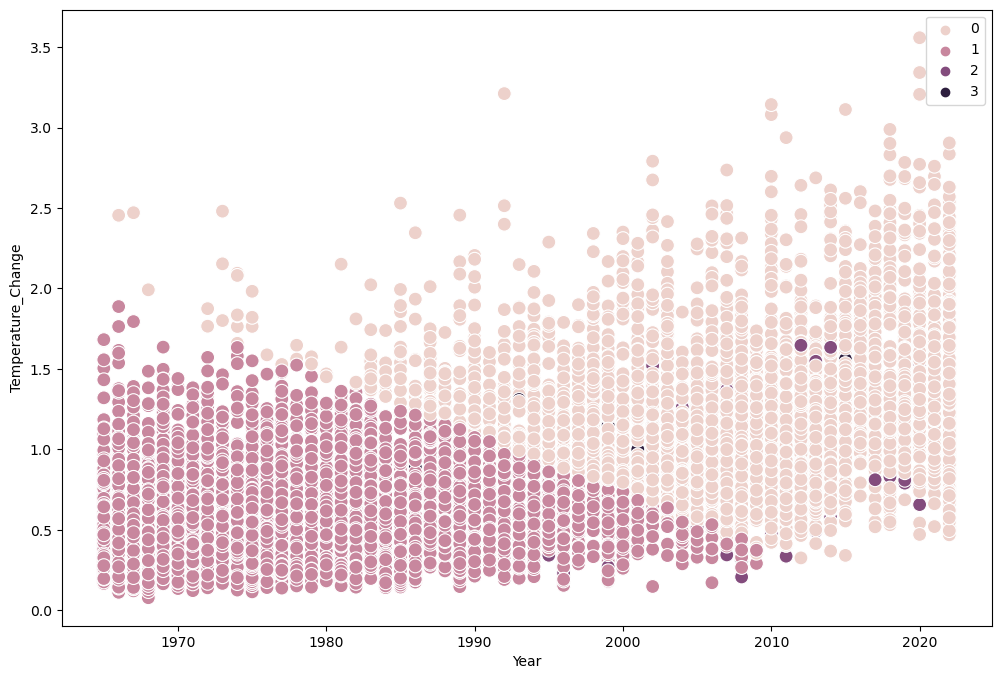

In [68]:
# Plot the clusters
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year'], y=df['Temp_Change_AVG'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year') # Label x-axis.
plt.ylabel('Temperature_Change') # Label y-axis.
plt.show()

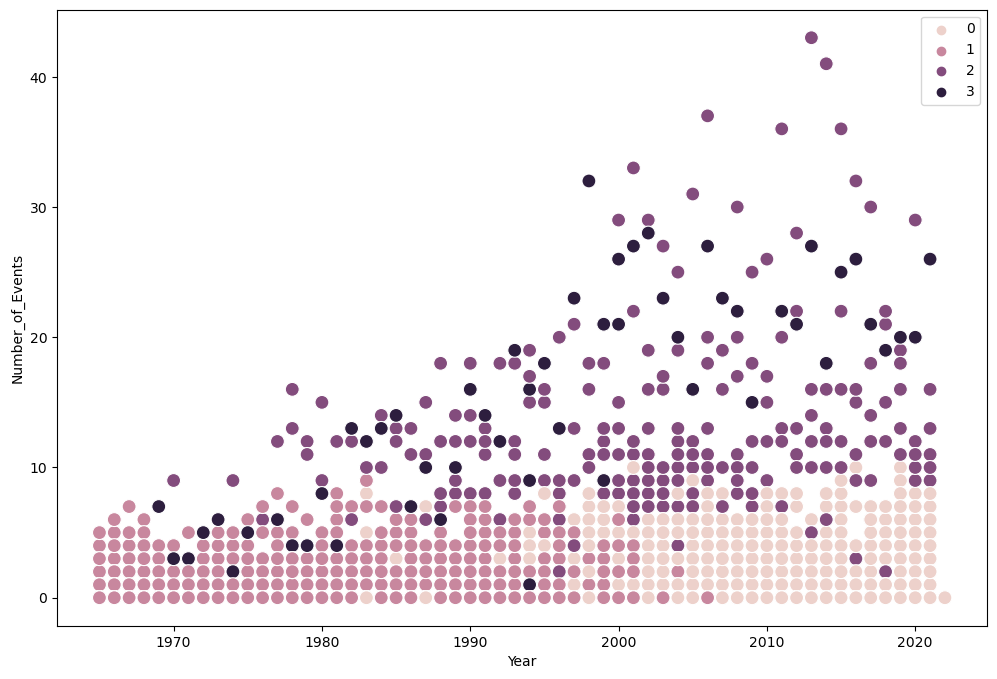

In [61]:
# Plot the clusters
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year'], y=df['Number_of_Events'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year') # Label x-axis.
plt.ylabel('Number_of_Events') # Label y-axis.
plt.show()

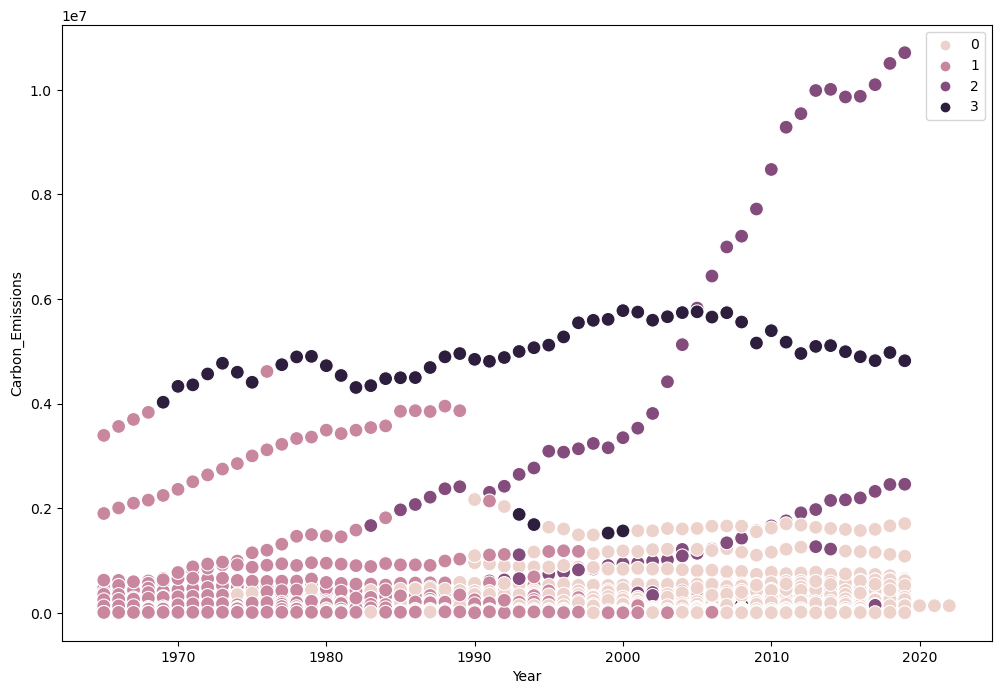

In [62]:
# Plot the clusters
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year'], y=df['Carbon_Emissions'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year') # Label x-axis.
plt.ylabel('Carbon_Emissions') # Label y-axis.
plt.show()

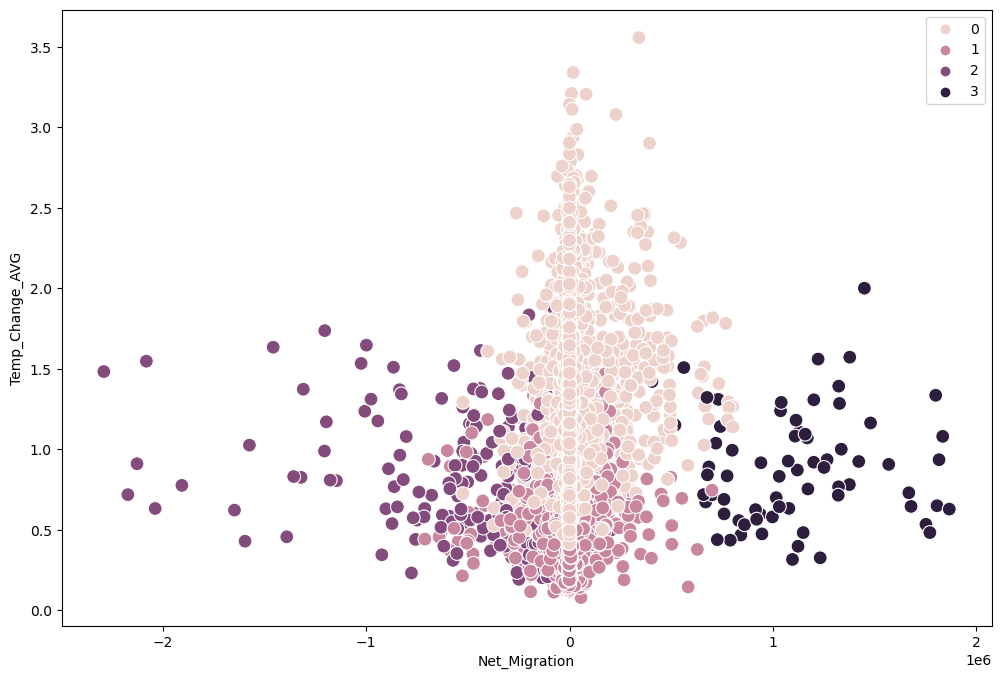

In [64]:
# Plot the clusters
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Net_Migration'], y=df['Temp_Change_AVG'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Net_Migration') # Label x-axis.
plt.ylabel('Temp_Change_AVG') # Label y-axis.
plt.show()

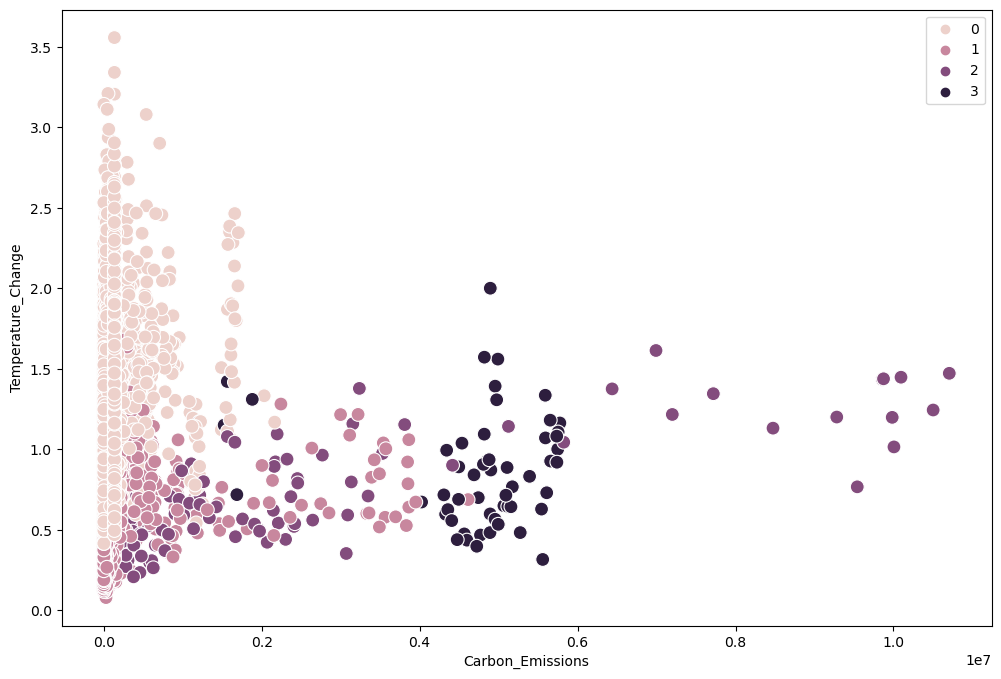

In [65]:
# Plot the clusters
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Carbon_Emissions'], y=df['Temp_Change_AVG'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Carbon_Emissions') # Label x-axis.
plt.ylabel('Temperature_Change') # Label y-axis.
plt.show()

In [66]:
# Copy 'Clusters' column to original df
df['Cluster'] = df_scaled['Clusters'].copy()

In [67]:
df.head()

,Unnamed: 0,Year,Country,Country_Code,Region,Continent,Number_of_Events,Temp_Change_AVG,Net_Migration,Population,Carbon_Emissions,Energy_Consumption,Cluster
0,0,1965,Indonesia,IDN,South-Eastern Asia,Asia,1.0,0.290833,-61146.0,100267062.0,24689.911,84.516020,1
1,1,1965,Argentina,ARG,South America,Americas,1.0,0.849750,33973.0,22159650.0,58866.351,328.527620,1
2,2,1965,Bangladesh,BGD,Southern Asia,Asia,3.0,0.387833,47618.0,55385112.0,19974.149,722.314282,1
3,5,1965,Bulgaria,BGR,Eastern Europe,Europe,1.0,1.321500,1838.0,8204168.0,46317.877,119.925650,1
4,6,1965,Bahamas (the),BHS,Caribbean,Americas,1.0,0.328250,2493.0,140059.0,1316.453,722.314282,1


In [69]:
df.loc[df['Cluster'] == 3, 'Cluster'] ='dark purple'
df.loc[df['Cluster'] == 2, 'Cluster'] ='purple'
df.loc[df['Cluster'] == 1, 'Cluster'] ='mauve'
df.loc[df['Cluster'] == 0, 'Cluster'] ='pink'

In [71]:
df.groupby('Cluster').agg({'Year':['mean', 'median'], 
                         'Number_of_Events':['mean', 'median'], 
                         'Temp_Change_AVG':['mean', 'median'],
                          'Net_Migration':['mean', 'median'],
                          'Population':['mean', 'median'],
                          'Carbon_Emissions':['mean', 'median'],
                          'Energy_Consumption':['mean', 'median']})

Year         Number_of_Events        Temp_Change_AVG  \
                    mean  median             mean median            mean   
Cluster                                                                    
dark purple  1995.328571  1994.5        12.957143   13.0        0.887414   
mauve        1980.870632  1980.0         0.669093    0.0        0.579698   
pink         2008.172370  2009.0         1.426616    1.0        1.225656   
purple       2002.218650  2003.0        11.524116   10.0        0.784765   

                      Net_Migration               Population               \
               median          mean     median          mean       median   
Cluster                                                                     
dark purple  0.856250  1.112226e+06  1102186.5  2.027160e+08  234808500.0   
mauve        0.526500 -3.489210e+03    -1203.0  1.905787e+07    4381482.0   
pink         1.145917  1.569345e+04     -573.0  1.693455e+07    5467766.0   
purple       0.710167 -3.328658e+05  -200144.0  3.405063e+08  109170502.0   

            Carbon_Emissions               Energy_Consumption                
                        mean        median               mean        median  
Cluster                                                                      
dark purple     3.688156e+06  4.756244e+06       17960.617959  21471.845500  
mauve           6.237451e+04  2.814961e+03         436.675348    148.851560  
pink            9.945940e+04  2.634000e+04         536.192228     85.242294  
purple          8.823261e+05  1.385700e+05        3619.170360    850.966100

Comments: 

- From the plots, it is apparent that the second cluster (dark purple) exhibits different behavior compared to the rest of the data. The data belonging to this cluster appears to follow distinct trends. Upon further analysis of the countries represented in this cluster, it is found that it includes data from the United States, China, and India.

- In the plots illustrating the relationship between year, events, and carbon emissions, it is noticeable that the clusters divide around 1992-1993. This finding suggests that it might be valuable to analyze the data in shorter time periods.

- The cluster analysis has highlighted the potential for categorizing the data based on factors such as population density, economic development, and political status. The data implies that these aspects might be more relevant drivers of migration than climate change variables such as natural disaster frequency and temperature change.

In [72]:
df.to_csv(os.path.join(path,'02 Data','Merged Data', 'data_clusters.csv'))